In [1]:
pip install pandas streamlit prophet plotly


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
from prophet import Prophet

# Load the generated data
df = pd.read_csv('baybee_sales_data.csv')

# Group by date to get total units sold per day
daily_sales = df.groupby('Date')['Units_Sold'].sum().reset_index()
daily_sales.columns = ['ds', 'y']  # Prophet requires columns named ds (date) and y (value)


c:\Users\monis\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
model = Prophet()
model.fit(daily_sales)

future = model.make_future_dataframe(periods=30)  # predict next 30 days
forecast = model.predict(future)


22:37:20 - cmdstanpy - INFO - Chain [1] start processing
22:37:21 - cmdstanpy - INFO - Chain [1] done processing


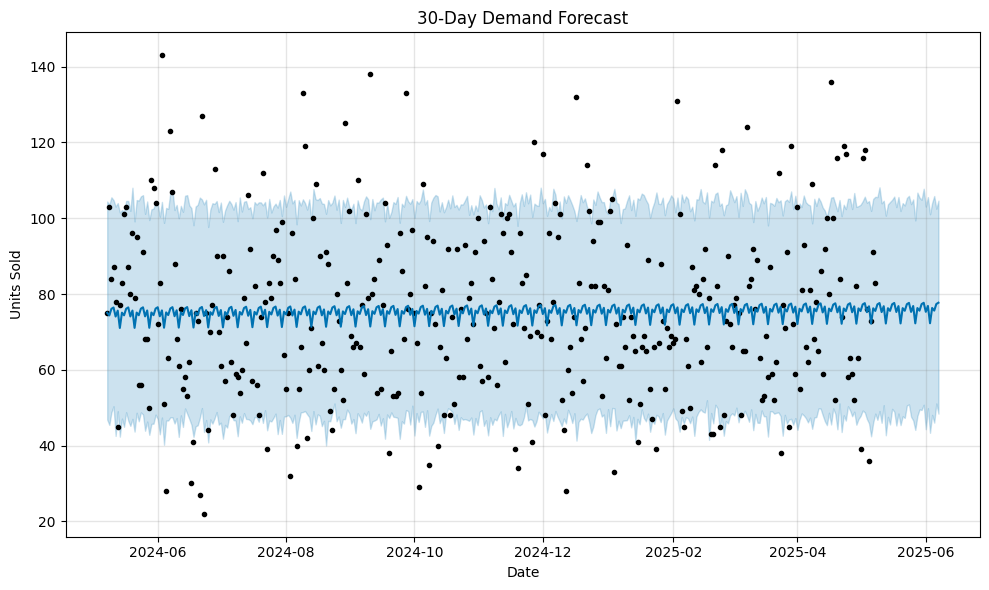

In [4]:
import matplotlib.pyplot as plt

model.plot(forecast)
plt.title("30-Day Demand Forecast")
plt.xlabel("Date")
plt.ylabel("Units Sold")
plt.tight_layout()
plt.show()
